In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
sns.set_theme(context='notebook', style='whitegrid', palette='bright')

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
!pip install textblob

In [70]:
col_names = ['Id', 'Entity', 'Sentiment', 'Tweet']
valid_data = pd.read_csv("/content/drive/MyDrive/twitter_validation.csv", names=col_names)
train_data = pd.read_csv("/content/drive/MyDrive/twitter_training.csv", names=col_names)

In [71]:
train_data.head()

,Id,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [72]:
valid_data.head()

,Id,Entity,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [73]:
# Check for missing values
train_data.isnull().sum()
valid_data.isnull().sum()

Id           0
Entity       0
Sentiment    0
Tweet        0
dtype: int64

In [74]:
# Checking the distribution of sentiment labels
train_sentiment_distribution = train_data.iloc[:, 2].value_counts()
valid_sentiment_distribution = valid_data.iloc[:, 2].value_counts()
train_sentiment_distribution,valid_sentiment_distribution

(Sentiment
 Negative      22542
 Positive      20832
 Neutral       18318
 Irrelevant    12990
 Name: count, dtype: int64,
 Sentiment
 Neutral       285
 Positive      277
 Negative      266
 Irrelevant    172
 Name: count, dtype: int64)

In [75]:
train_data.iloc[:, 1].nunique()

32

In [97]:
# Remove duplicate rows from the training set
train_data_cleaned = train_data.drop_duplicates()

In [77]:
# Drop rows with missing tweet/message values
train_data_cleaned.dropna(subset=[train_data.columns[3]])

,Id,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [78]:
# Verify the cleaning
remaining_duplicates_train = train_data_cleaned.duplicated().sum()
remaining_missing_train = train_data_cleaned.isnull().sum()

remaining_duplicates_train, remaining_missing_train

(0,
 Id             0
 Entity         0
 Sentiment      0
 Tweet        326
 dtype: int64)

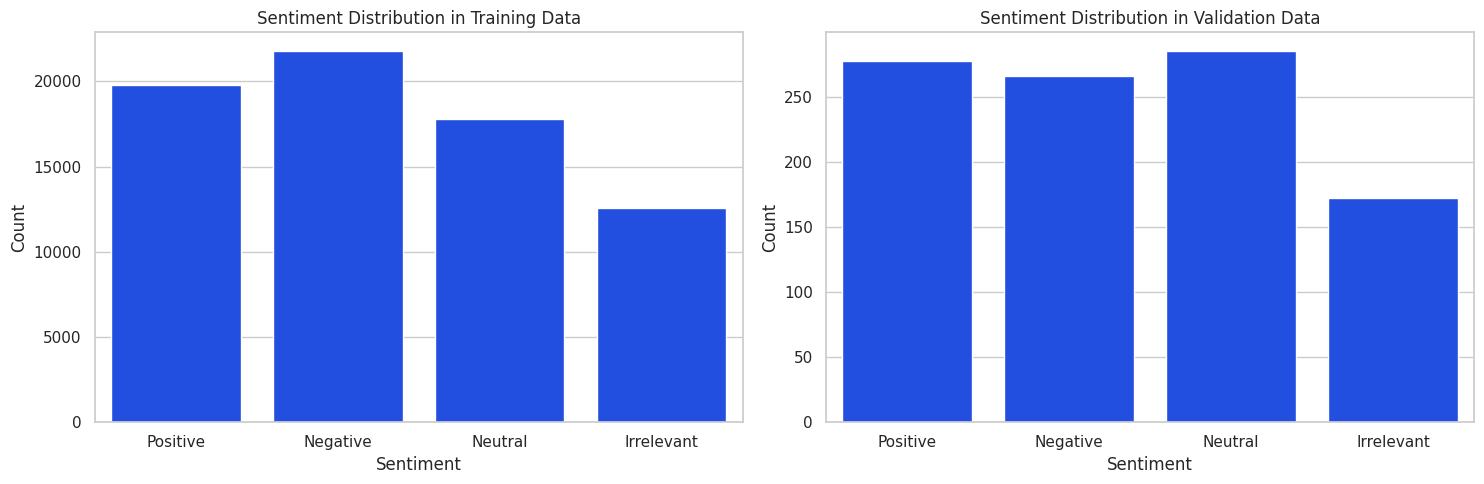

In [79]:
# Set up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot sentiment distribution for training data
sns.countplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[0])
ax[0].set_title('Sentiment Distribution in Training Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sentiment')

# Plot sentiment distribution for validation data
sns.countplot(data=valid_data, x=valid_data.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[1])
ax[1].set_title('Sentiment Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()

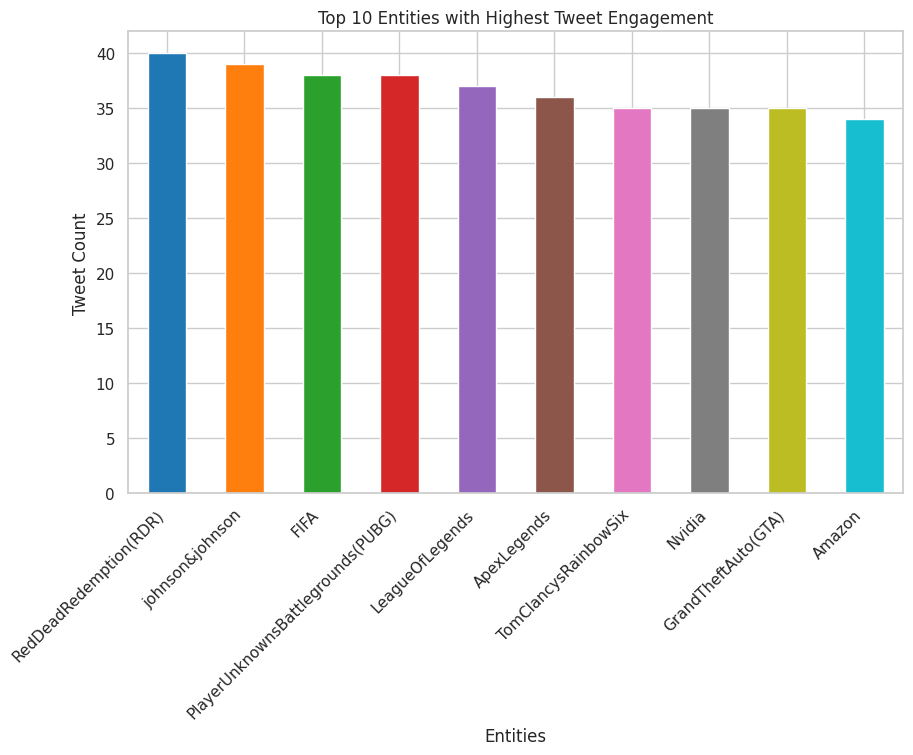

In [80]:
# Bar Chart representation of top 10 most engaged entities on tweets
# Count the occurrences of each category
entity_counts = valid_data['Entity'].value_counts()

# Select the top 10 categories
top_10_entity = entity_counts.head(10)

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot a bar graph for the top 10 categories with colors
plt.figure(figsize=(10, 6))
top_10_entity.plot(kind='bar', color=colors)

# Remove the annotate part to not show values on top of each bar

plt.xlabel("Entities")
plt.ylabel('Tweet Count')
plt.title('Top 10 Entities with Highest Tweet Engagement')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

#The highest tweet count is of RedDeadRedeemption entity which is 40, Lowest tweet count is of Fortnite.


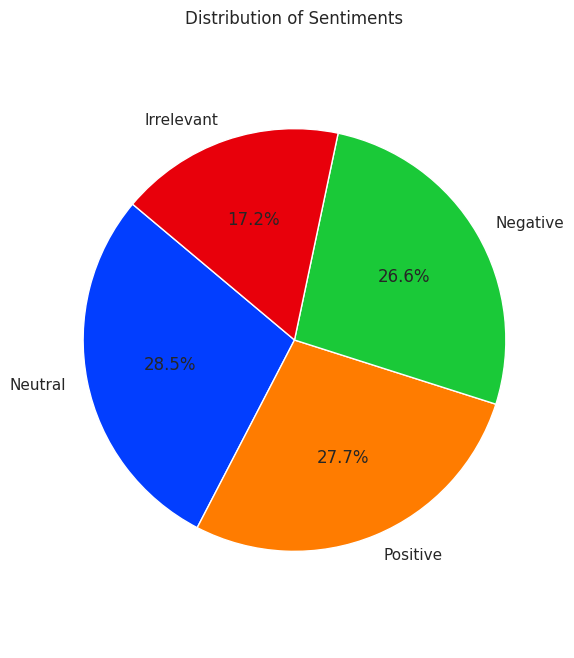

In [81]:
#EXPLORATORY DATA ANALYSIS
#Pie Chart representation of sentiment distribution
# Count the occurrences of each category
category_counts =valid_data['Sentiment'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title('Distribution of Sentiments')
plt.show()

#There are 27.7% positive sentiment texts, 26.6% negative sentiment texts,
#17.1% Irrelevant sentiment texts and 28.5% neutral sentiment texts in the dataset

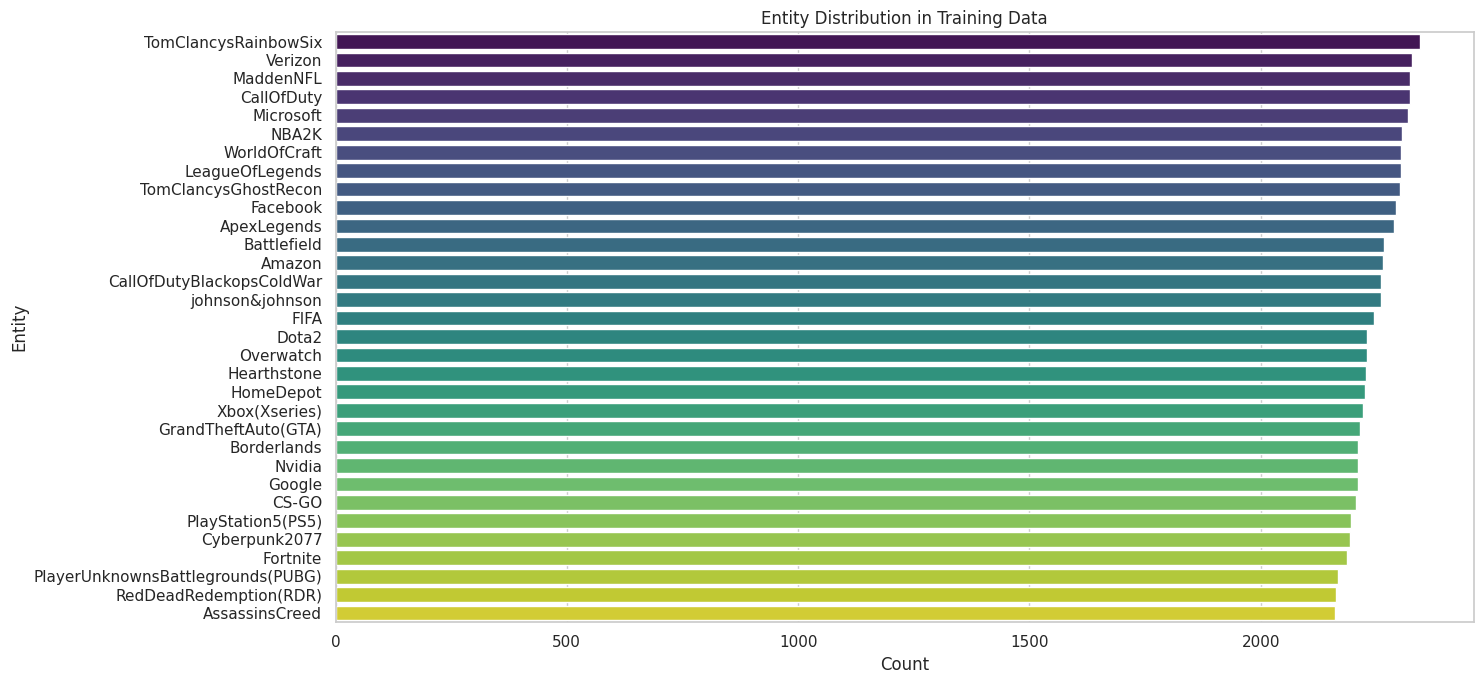

In [82]:
plt.figure(figsize=(15, 7))

# Plot entity distribution for training data
sns.countplot(data=train_data_cleaned, y=train_data_cleaned.columns[1], order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index, palette='viridis')
plt.title('Entity Distribution in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()

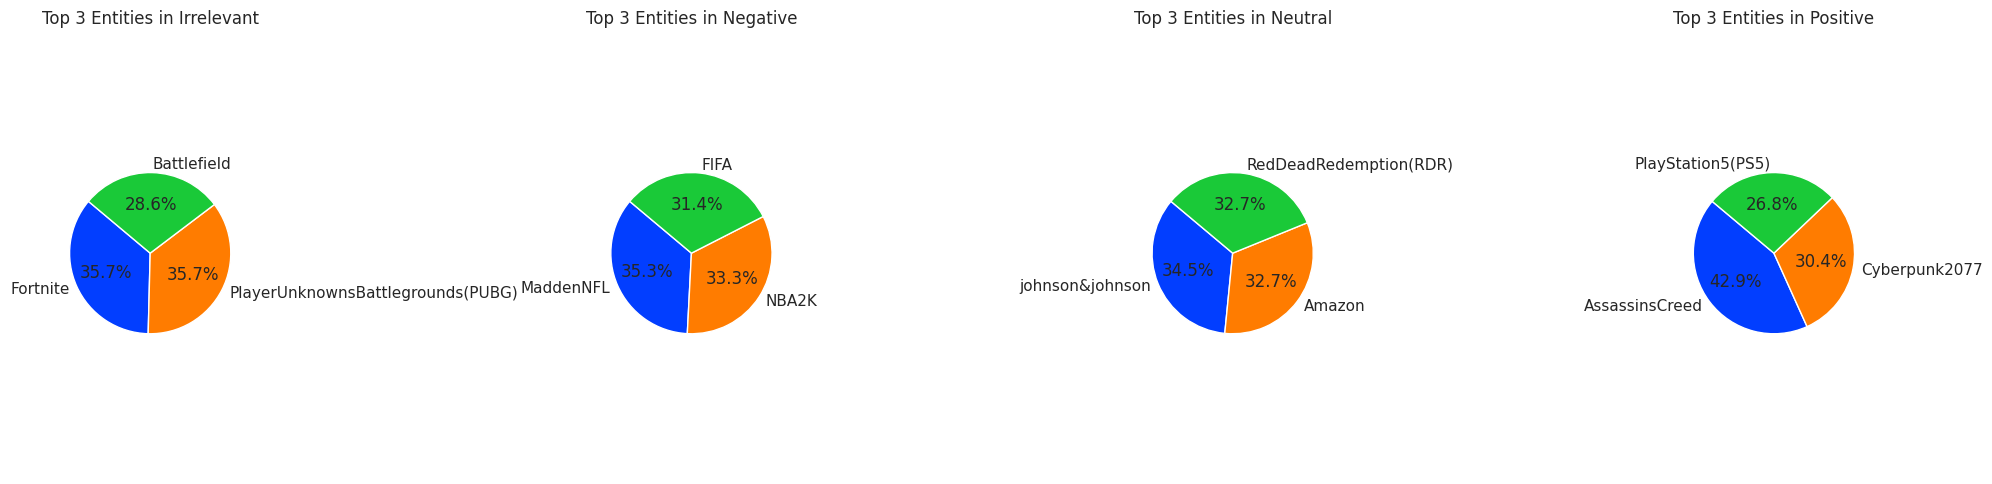

In [83]:
# Pie chart representation of the top three entities in each sentiment category
# Group the data by 'tweet_category' and 'entity' and count occurrences
category_entity_counts = valid_data.groupby(['Sentiment', 'Entity']).size().unstack(fill_value=0)

# Create a list to store the top 3 entities for each category
top_three_entities = []

# Iterate through each category
for category in category_entity_counts.index:
    top_entities = category_entity_counts.loc[category].nlargest(3)
    top_three_entities.append(top_entities)

# Determine the number of subplots based on the number of categories
num_categories = len(category_entity_counts.index)

# Create subplots for each category
plt.figure(figsize=(5 * num_categories, 5))
for i, (category, top_entities) in enumerate(zip(category_entity_counts.index, top_three_entities), start=1):
    plt.subplot(1, num_categories, i)
    plt.pie(top_entities, labels=top_entities.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Top 3 Entities in {category}')

plt.tight_layout()
plt.show()

In [84]:
train_data_cleaned['message_length'] = train_data_cleaned[train_data_cleaned.columns[3]].fillna('').apply(len)
valid_data['message_length'] = valid_data[valid_data.columns[3]].fillna('').apply(len)


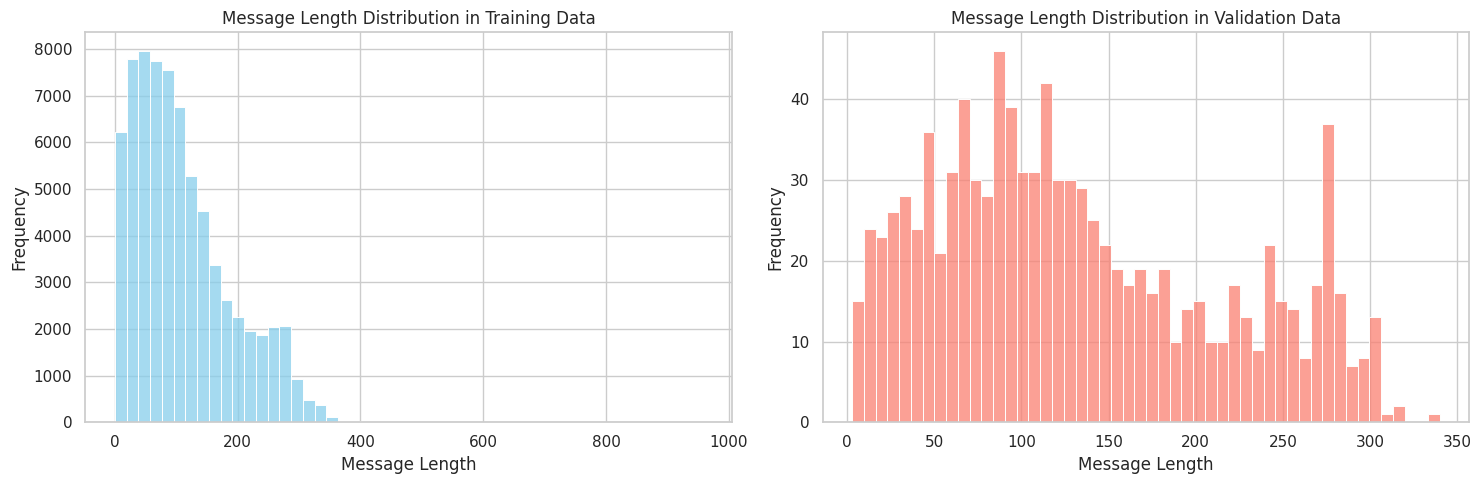

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot message length distribution for training data
sns.histplot(train_data_cleaned['message_length'], bins=50, ax=ax[0], color='skyblue')
ax[0].set_title('Message Length Distribution in Training Data')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Message Length')

# Plot message length distribution for validation data
sns.histplot(valid_data['message_length'], bins=50, ax=ax[1], color='salmon')
ax[1].set_title('Message Length Distribution in Validation Data')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Message Length')

plt.tight_layout()
plt.show()

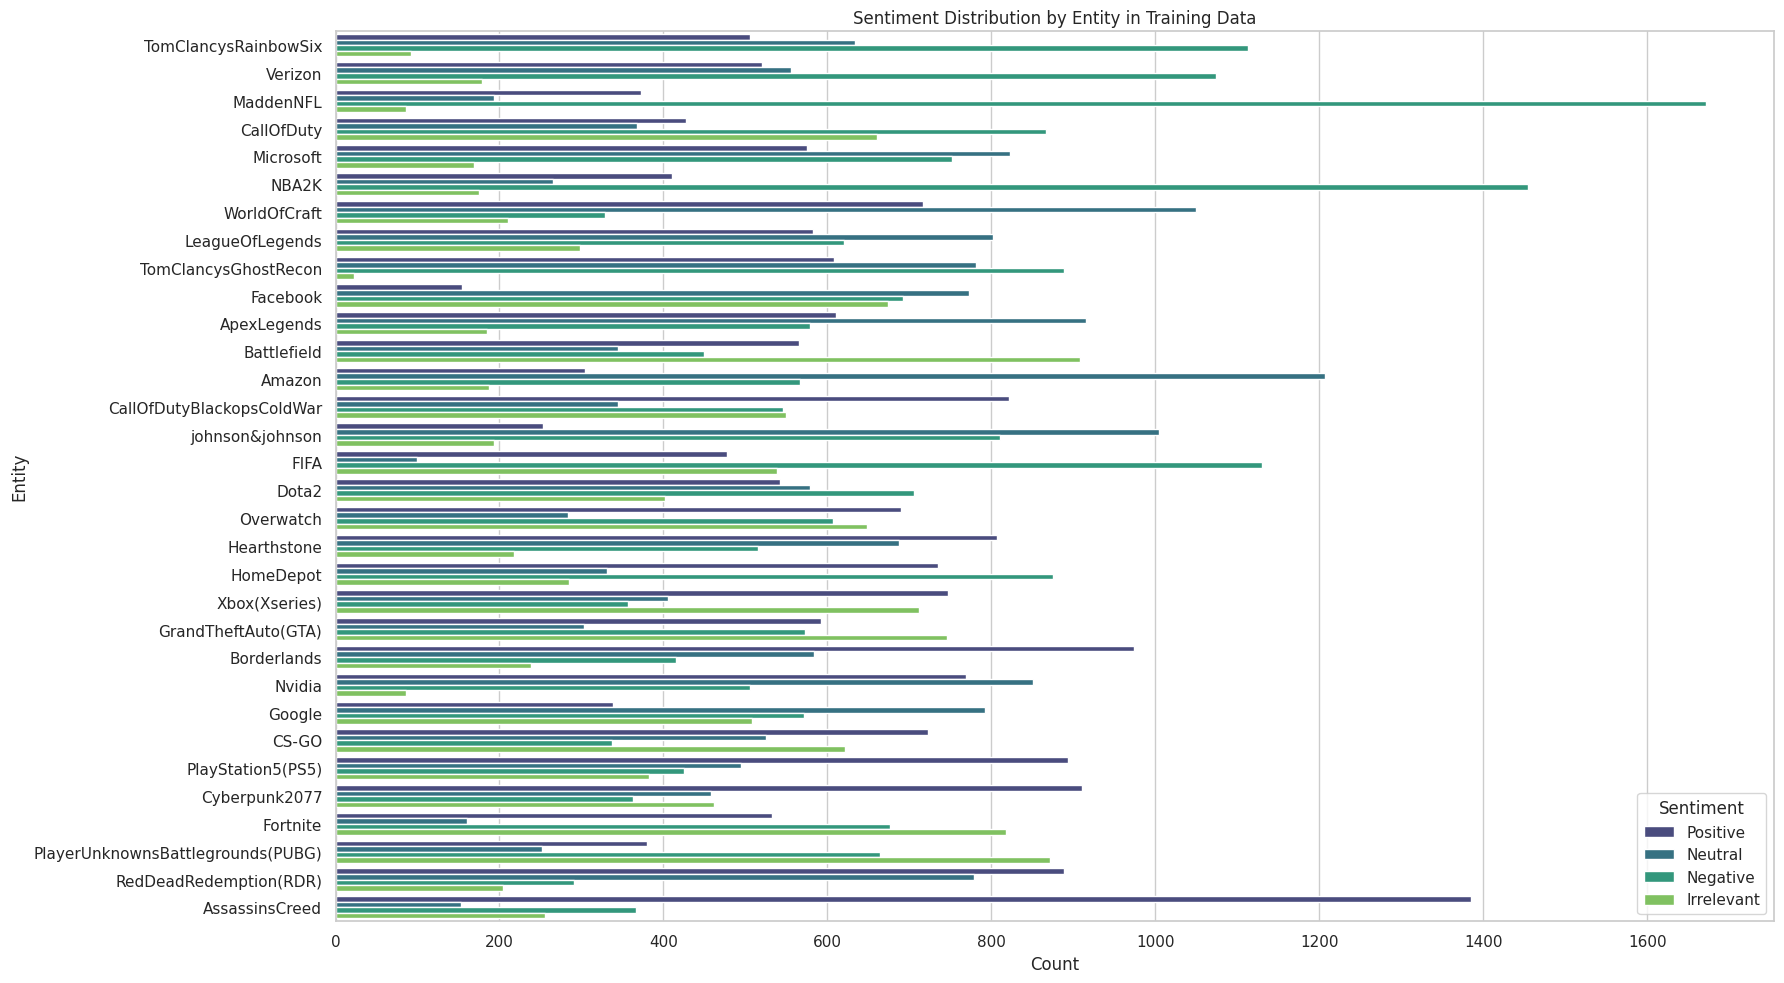

In [86]:
plt.figure(figsize=(18, 10))

# Plot sentiment distribution by entity
sns.countplot(data=train_data_cleaned, y=train_data_cleaned.columns[1], hue=train_data_cleaned.columns[2], order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index, palette='viridis')
plt.title('Sentiment Distribution by Entity in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

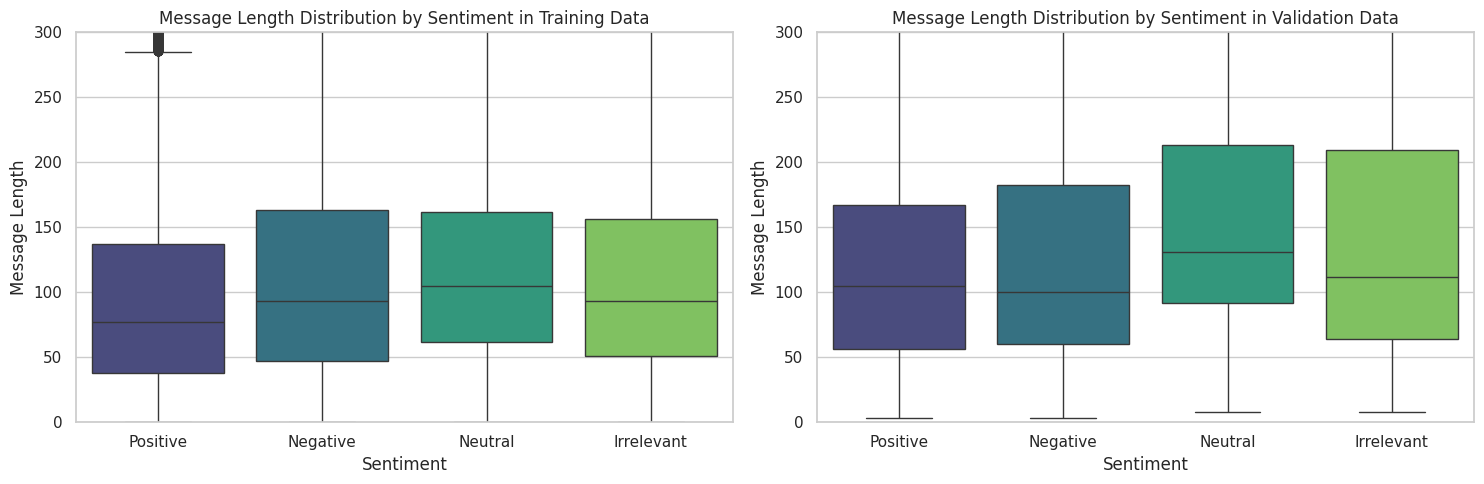

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot message length distribution by sentiment for training data
sns.boxplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], y='message_length', ax=ax[0], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
ax[0].set_title('Message Length Distribution by Sentiment in Training Data')
ax[0].set_ylabel('Message Length')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylim(0, 300)

# Plot message length distribution by sentiment for validation data
sns.boxplot(data=valid_data, x=valid_data.columns[2], y='message_length', ax=ax[1], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
ax[1].set_title('Message Length Distribution by Sentiment in Validation Data')
ax[1].set_ylabel('Message Length')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylim(0, 300)

plt.tight_layout()
plt.show()

In [88]:
# Define a function to handle non-string values
def analyze_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return 0.0

In [89]:
# Perform sentiment analysis
train_data['Polarity'] = train_data['Tweet'].apply(analyze_sentiment)

# Categorize sentiment
train_data['Sentiment_Label'] = train_data['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [90]:
# Perform sentiment analysis
valid_data['Polarity'] = valid_data['Tweet'].apply(analyze_sentiment)

# Categorize sentiment
valid_data['Sentiment_Label'] = valid_data['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

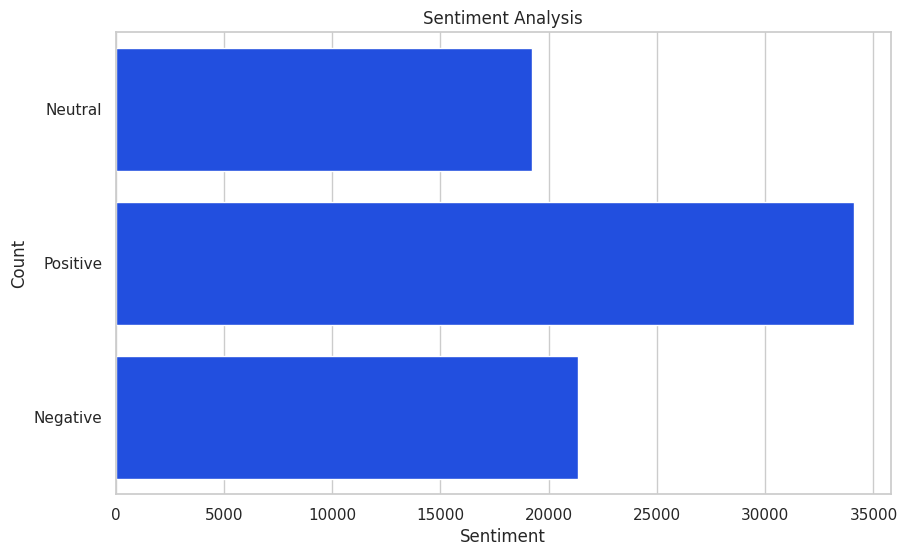

In [91]:
# Analyze sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(train_data['Sentiment_Label'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<Figure size 1500x800 with 0 Axes>

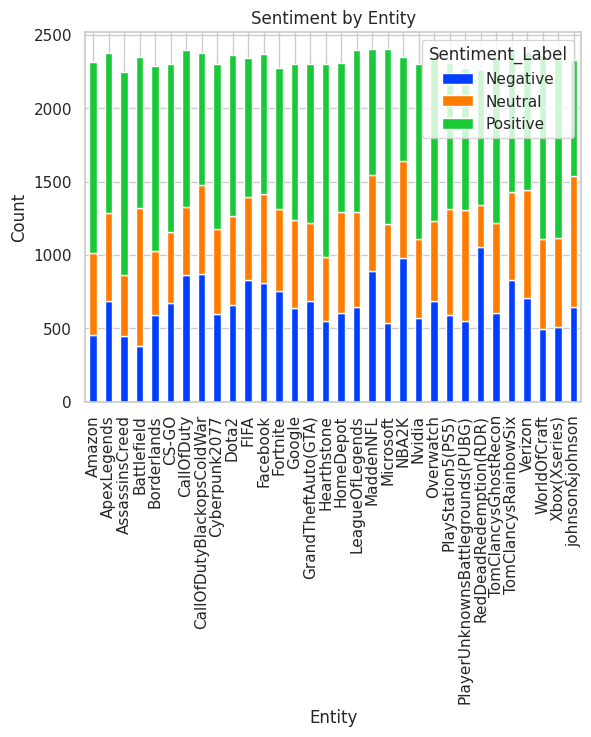

In [92]:
# Analyze sentiment by topic
plt.figure(figsize=(15,8))
sentiment_by_topic = train_data.groupby(['Entity', 'Sentiment_Label']).size().unstack(fill_value=0)
sentiment_by_topic.plot(kind='bar', stacked=True)
plt.title('Sentiment by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.show()

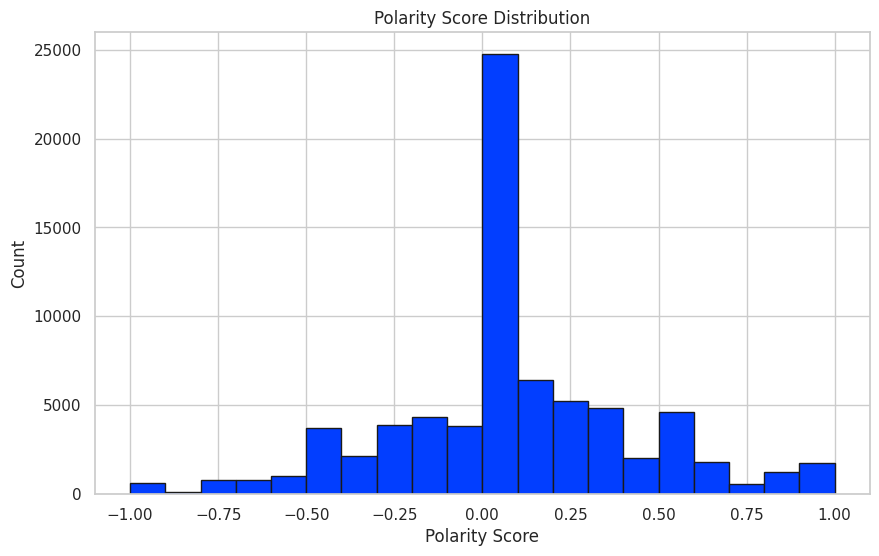

In [93]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['Polarity'], bins=20, edgecolor='k')
plt.title('Polarity Score Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Count')
plt.show()

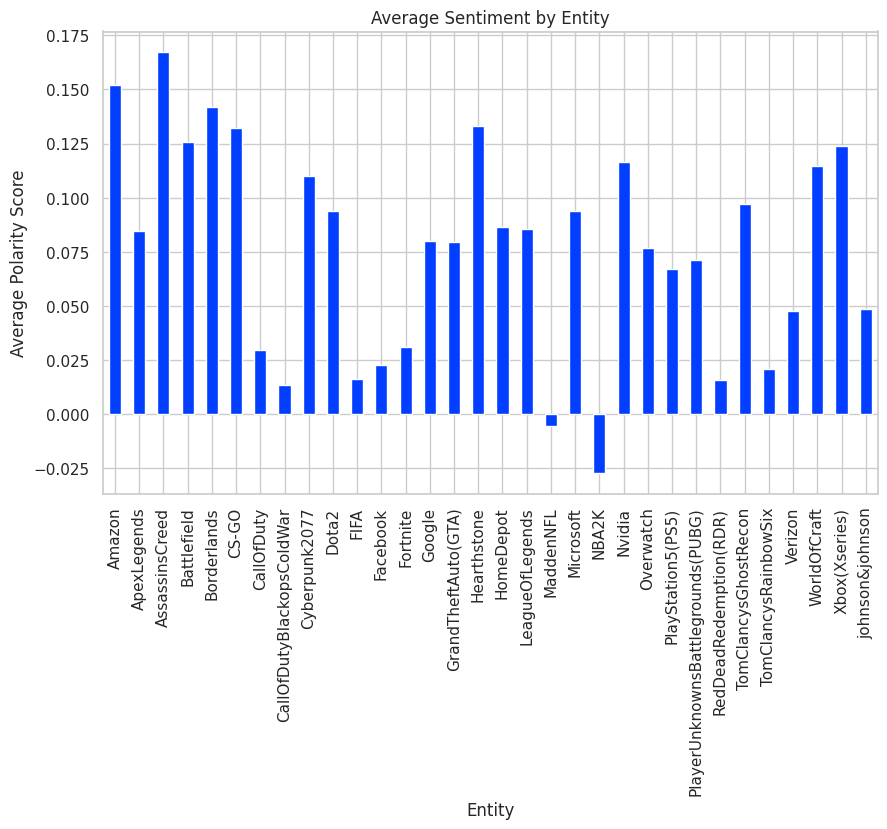

In [94]:
plt.figure(figsize=(10, 6))
average_polarity_by_topic = train_data.groupby('Entity')['Polarity'].mean()
average_polarity_by_topic.plot(kind='bar')
plt.title('Average Sentiment by Entity')
plt.xlabel('Entity')
plt.ylabel('Average Polarity Score')
plt.show()

In [95]:
# Visualize the most positive and negative tweets
most_positive_tweet = train_data[train_data['Polarity'] == train_data['Polarity'].max()]['Tweet'].values[0]
most_negative_tweet = train_data[train_data['Polarity'] == train_data['Polarity'].min()]['Tweet'].values[0]

print('Most Positive Tweet:')
print(most_positive_tweet)

print('\nMost Negative Tweet:')
print(most_negative_tweet)

Most Positive Tweet:
Platinum is the best loot @Borderlands  

Most Negative Tweet:
"What terrible bitch!"


In [96]:
# Visualize the most positive and negative tweets
most_positive_tweet = valid_data[valid_data['Polarity'] == valid_data['Polarity'].max()]['Tweet'].values[0]
most_negative_tweet = valid_data[valid_data['Polarity'] == valid_data['Polarity'].min()]['Tweet'].values[0]

print('Most Positive Tweet:')
print(most_positive_tweet)

print('\nMost Negative Tweet:')
print(most_negative_tweet)

Most Positive Tweet:
Best squad yet#pubg #pubgmobile #pubgkenya instagram.com/p/B-Obt_eAA4f/…

Most Negative Tweet:
@EAMaddenNFL franchise and face of the franchise are both terrible. @NFL #NFLdropEA #NFLDROPSEA
